# Ventas de Verano 2020 de Wish

### Título de la base de datos
Sales of summer clothes in E-commerce Wish  
### Descripción de los datos
La base de datos está compuesta por tres archivos de tablas en formato CSV, de las cuales consideraremos un conjunto de columnas del archivo principal. Las siguientes columnas contienen información útil para nuestros objetivos. Estas columnas están contenidas en el archivo *summer-products-with-rating-and-performance_2020-08.csv.  

Contamos con una gran variedad de datos englobados a la comercializacion de un producto de verano en la plataforma Wish entre los mas relevantes son el precio, unidades vendicas, calificacion del producto, descripcion del producto, tipo de envío, palabras claves para que el producto sea arrojado, entre otros.

##### *Utilizando herramientas vistas en clase*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")
etiquetas=pd.read_csv("unique-categories.sorted-by-count.csv")

Aquí tenemos nuestros datos en donde se utilizan dos archivos. El primero "summer-products-with-rating-and-performance_2020-08" es donde se encuentran nuestros principales datos ya que tiene las características del producto según la página de wish en donde vienen el precio,nombre del producto, vendedor, calificación, etc.

Por otro lado tenemos que en "unique-categories.sorted-by-count.csv" se encuentran las etiquetas con las cuales están organizados los productos de nuestra base de datos y también nos ayudarán en el proceso.

In [3]:
print(df.shape)
print(etiquetas.shape)

(1573, 43)
(2620, 2)


La base de datos de las caracteristicas tiene 1573 filas con 43 columnas y el de las etiquetas 2620 filas y 2 columnas. A continuación mostramos los primeros 5 elementos de ambas bases de datos.

In [4]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [5]:
etiquetas.head()

,count,keyword
0,1321,Summer
1,1315,Women's Fashion
2,1082,Fashion
3,961,Women
4,905,Casual


Ahora mostramos las columnas junto con sus tipos de datos.

In [6]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [7]:
etiquetas.columns

Index(['count', 'keyword'], dtype='object')

In [8]:
df.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


In [9]:
etiquetas.dtypes

count       int64
keyword    object
dtype: object

### Justificación de los datos  
Entre las características que nos convencieron para usar esta base de datos es la cantidad abundante de información que posee en columnas, el formato de CSV que tiene y su cantidad de datos que en total son 1573, de igual forma se tiene por separado otro archivo con las etiquetas y el número de veces con que aparece. Esto a nuestro parecer nos permite tener una mayor exactitud en los analisis que realizaremos.
    
En la actualidad, las compras en línea es una tendencia que va creciendo conforme pasa el tiempo como parte de una era más digitalizada, interactuar con una plataforma digital en este caso Wish, nos es familiar debido a que hemos sido usuarios de otras plataformas que se dedican a esto, creemos que puede ser una ventaja debido a que teniendo ya conocimiento nos puede ayudar a entender el significado de datos y darles interpretación correcta.  

Cada día las ventas online se estan volviendo mas "normales" y la tendencia de comprar a través de una plataforma está en crecimiento debido a que se les ofrece mas ventajas a los usuarios como es el evitar largas filas y no salir de la comodidad de su hogar, como beneficio creemos que puede ayudarnos a un mayor entendimiento de estas plataformas digitales de venta online, como es que funcionan y que hay detrás de estas plataformas visto desde el punto de vista del vendedor y no el usuario, es decir como el vendedor puede saber si tendra exito en esta plataforma.

### Planteamiento del problema  
Un emprendedor cuenta con una línea de productos de verano que vende a través de varios locales de su ciudad, está interesado en hacer crecer su negocio y que sus productos puedan llegar a más partes del mundo. 

Le recomendaron incursionar en las ventas online a través de la plataforma de Wish pero tiene miedo de fracasar en el intento y hacer una sobreproducción de sus productos. El quisiera saber cuáles de sus productos podría comerciar en esta plataforma de tal manera que resulten productos exitosos, es decir que tengan una buena venta y sean populares entre los usuarios.  

Por lo tanto, el problema que notamos tiene que ver con distintos aspectos que se manejan en la plataforma como el uso de publicidad, el tipo de envío que se maneja, el vendedor que se ubica entre el gusto del usuario y el producto, entre otras cosas determinantes como lo es en una temporada fuerte que es el verano. Así que sería de buen provecho el saber lo determinante que, desde el punto de vista del cliente, mejoraría su experiencia en las compras online aumentado el gusto de hacerlo y con ella crear mejores relaciones para futuras compras.  

De esta manera, nuestro enfoque es que a partir de los datos que tenemos de las ventas del verano, ayudar al emprendedor que quiera vender en la plataforma de Wish para que esté preparado el siguiente verano y que tenga el resultado que espera en su negocio.  

### Objetivos  
Objetivos principales:
- Obtener una serie de características que hacen que un producto sea exitoso en la plataforma de Wish.
- Predecir las unidades vendidas que tendrá un producto de acuerdo a las características que lo componen.
- Dar una serie de recomendaciones al vendedor para lograr un aumento de sus ventas.  

Objetivos secundarios:
- Realizar un análisis descriptivo sobre las características de los productos de verano de Wish
- Clasificar los productos mostrados en categorías de características en común y determinar el éxito de estas categorías.
- Reconocer características similares de los productos más vendidos para identificar el tipo de productos que aparecerá más frecuentemente en las recomendaciones de estos productos exitosos. 

## Desarrollo de heraramientas
### Limpieza de los datos
Mostramos los primeros elementos de ambas tablas sin manipulación.

In [10]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [11]:
etiquetas.head()

,count,keyword
0,1321,Summer
1,1315,Women's Fashion
2,1082,Fashion
3,961,Women
4,905,Casual


Comenzando con la limpieza quitaremos columnas que no tienen información de nuestro interés explicadas a continuación:

- currency_buyer.- Se elimina esta columna ya que no nos interesa la moneda, además se usa la misma al estar situada en euros

- rating_five_count, rating_four_count, rating_three_count, rating_two_count, rating_one_count .- Se eliminan ya que utilizaremos solamente el rating ya promediado

- badges_count.- No nos interesa mucho el saber cuántas tiene sino cuales son las que se poseen

- product_variation_size_id.- Las omitimos ya que se muestran muchas tallas diferentes y hay distintos tipos de productos

- inventory_total.- Los inventarios son mayores de 50 y solo se muestra ese valor

- merchant_title.- No es de interés el nombre público del vendedor

- merchant_name.- No es de interés el nombre de usuario del vendedor

- product_url.- Solo sirve para la consulta de los datos pero no es de interés en el análisis

- merchant_profile_picture.- No es de interés saber la foto de perfil del vendedor

- product_picture .- No es determinante ver la foto del producto 

- theme.- Queda aclarado en la base de datos que todos son de verano

- crawl_month.- Todos son ubicados en el mes de agosto

In [12]:
Datos_PIA=df.drop(['currency_buyer','rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count','badges_count','product_variation_size_id',
        'inventory_total','merchant_title', 'merchant_name','product_url', 'merchant_profile_picture',
        'product_picture','theme','crawl_month'],axis=1)

Así, conservamos las siguientes columnas:

In [13]:
Datos_PIA.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'has_urgency_banner', 'urgency_text', 'origin_country',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture', 'product_id'],
      dtype='object')

Se procede a verificar en qué columnas se encuentran datos nulos. Como el dataframe de etiquetas no tiene datos nulos, no sufrirá cambios. Para la base de datos principal vemos la suma de cuántos datos nulos hay.

In [14]:
Datos_PIA.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
has_urgency_banner              1100
urgency_text                    1100
origin_country                    17
merchant_info_subtitle             1
merchant_rating_count              0
merchant_rating                    0
merchant_id                        0
merchant_has_profile_picture       0
product_id                         0
d

Esto nos ayuda a enfocarnos en las columnas product_color, has_urgency_banner, urgency_text, origin_country y merchant_info_subtitle.

Rellenamos los espacio vacíos.

In [15]:
Datos_PIA_limpio=Datos_PIA.fillna(0)

Se cambian los ceros de estas columnas ya que nos es más util mostrar aquí que no hay ninguna selección

In [16]:
Datos_PIA_limpio.urgency_text=Datos_PIA_limpio.urgency_text.replace(0,"ninguno")
Datos_PIA_limpio.product_color=Datos_PIA_limpio.product_color.replace(0,"ninguno")
Datos_PIA_limpio.origin_country=Datos_PIA_limpio.origin_country.replace(0,"ninguno")
Datos_PIA_limpio.merchant_info_subtitle=Datos_PIA_limpio.merchant_info_subtitle.replace(0,"ninguno")

Algo que tenemos que considerar es que nos interesa cambiar los valores de la columna "merchant_info_subtitle", ya que es un enunciado con la reputación pero en algunos casos no viene el porcentaje así que se asignará un 0 a pesar de tener reseñas.

In [17]:
Detalles=list(Datos_PIA_limpio.merchant_info_subtitle)

Aquí hacemos una lista y nos interesa tener el número a lado del porcentaje ya que es lo positivo de las reseñas.

In [18]:
for i in range(0,len(Detalles)):   
    auxiliar=Detalles[i]
    flag= "%" in auxiliar
    if flag==True:
        auxiliar2=auxiliar.replace(" ","")
        posicion=auxiliar2.find("%")
        Detalles[i]=float(auxiliar[(posicion-2):posicion])/100
    else:
        Detalles[i]=0

Hacemos el cambio de los datos.

In [19]:
Datos_PIA_limpio["merchant_info_subtitle"]=Detalles
print(Datos_PIA_limpio["merchant_info_subtitle"])

0       0.00
1       0.83
2       0.86
3       0.00
4       0.85
        ... 
1568    0.90
1569    0.00
1570    0.86
1571    0.77
1572    0.90
Name: merchant_info_subtitle, Length: 1573, dtype: float64


Aquí asignamos a las columnas en donde los datos son 0 y 1 el tipo de bool ya que es lo que representan y nos interesa que tengan su tipo correspondiente.

In [20]:
Datos_PIA_limpio.uses_ad_boosts=Datos_PIA_limpio.uses_ad_boosts.astype("bool")
Datos_PIA_limpio.badge_local_product=Datos_PIA_limpio.badge_local_product.astype("bool")
Datos_PIA_limpio.badge_product_quality=Datos_PIA_limpio.badge_product_quality.astype("bool")
Datos_PIA_limpio.badge_fast_shipping=Datos_PIA_limpio.badge_fast_shipping.astype("bool")
Datos_PIA_limpio.shipping_is_express=Datos_PIA_limpio.shipping_is_express.astype("bool")
Datos_PIA_limpio.has_urgency_banner=Datos_PIA_limpio.has_urgency_banner.astype("bool")
Datos_PIA_limpio.merchant_has_profile_picture=Datos_PIA_limpio.merchant_has_profile_picture.astype("bool")

Finalmente guardamos los datos que vamos a usar en un nuevo archivo csv.

In [21]:
Datos_PIA_limpio.to_csv("summer-products-limpio.csv",index=False)

### Estadística básica de los datos

Realizamos algunas estadísticas que creimos necesarias para observar rangos y puntos de partida para algun análisis futuro.
Usamos una instrucción para no dejarlas por partes.

In [22]:
Datos_PIA_limpio[["units_sold","rating","price","merchant_rating","rating_count"]].describe()

,units_sold,rating,price,merchant_rating,rating_count
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,4339.005086,3.820896,8.325372,4.032345,889.659250
std,9356.539302,0.515374,3.932030,0.204768,1983.928834
min,1.000000,1.000000,1.000000,2.333333,0.000000
25%,100.000000,3.550000,5.810000,3.917353,24.000000
50%,1000.000000,3.850000,8.000000,4.040650,150.000000
75%,5000.000000,4.110000,11.000000,4.161797,855.000000
max,100000.000000,5.000000,49.000000,5.000000,20744.000000


##### Unidades vendidas
Aquí se puede observar un dato interesante ya que nos muestra que lo máximo que se ha podido vender en la temporada es 100,000, además que la media es de 4336.00539302 muy desproporcional al la mediana que es de 1000.
Interpretando esto podemos ver que alrededor del 50% de los productos en los datos no vendieron más de 1000, entonces nos da oportunidad de ver las debilidades y después corregirlas para generar más ventas, comparando con los que si vendieron.
##### Rating
Del rating que nos interesa de los productos podemos ver que el 50% de los datos resultan ser mayores a 3.85, lo cual es parecido a la media con 3.82, por lo tanto es normal que muchos de los vendedores pueden tender a tener una calificación de más de 3 estrellas.
##### Precio
Del precio es una varibale interesante en saber ya que este puede ser observado como el precio de descuentos de verano o similar y observamos que lo maximo que hay es de 49 euros y lo demás resulta ser muy barato ya que al 75% de los datos resultan ser menores a 11 euros, con lo cual son promociones para este tiempo.
##### Rating de vendedor
De igual forma en esta parte observamos la puntuación que se le asigna al vendedor y se observa ser muy positiva siento que el 75% de los datos resulta ser mayor a 3.91 entonces es un punto bueno en que la mayoría tiene buen perfil.
##### Número de ratings
Esta parte nos interesa para saber si los ratings de los productos puedan ser acertados dependiendo de las reseñas que ha tenido, y por lo que vemos es mucha la brecha que hay en los clientes para dar reseñas por que resulta que al menos el 50% tienen 150 reseñas a comparacion de otros donde el máximo resulta ser hasta 20,744.

### Gráficas

Primero analizaremos las dos variables que buscamos predecir: Las unidades vendidas y el rating.

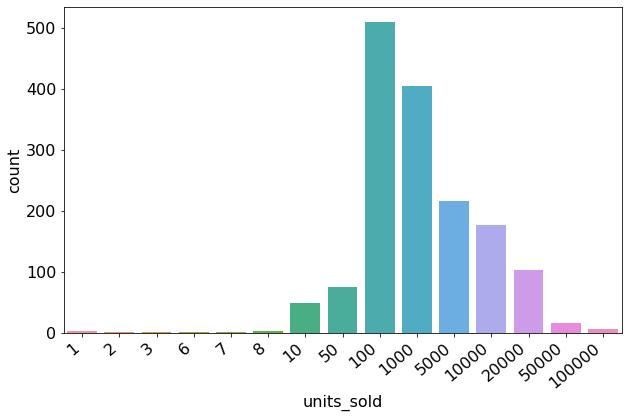

In [23]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 16})
p=sns.countplot(Datos_PIA_limpio['units_sold'])
p.set_xticklabels(p.get_xticklabels(), rotation=40, ha="right")
plt.show()

Observamos que los datos de unidades vendidas no muestran valores continuos, sino varias categorías a las que las verdaderas unidades vendidas se acercan más. La mayor cantidad de los productos vende lo que podemos considerar entre 100 y 999 unidades. El éxito de un producto en este criterio corresponderá a las categorías mayores.

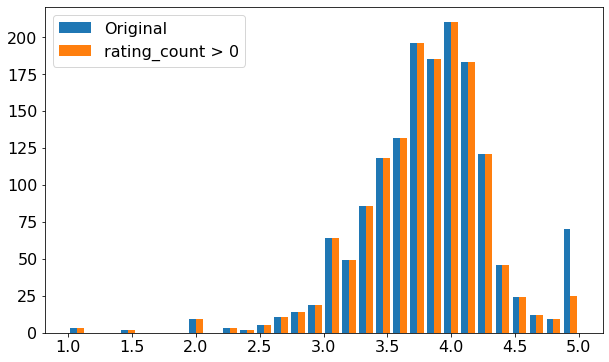

In [24]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 16})
plt.hist([Datos_PIA_limpio.rating,Datos_PIA_limpio[Datos_PIA_limpio["rating_count"]>0].rating],
           bins=30,label=["Original","rating_count > 0"])
plt.legend()
plt.show()

La mayoría de los productos parece tener un rating entre 3 y 4.5. Es poco común que el rating sea menor que 2.5, y el histograma sugiere que el rango de 3.5 a 4 tiene la mayor concentración. Observamos una inusual cantidad de ratings de 5, la cual podemos suponer que se debe a los productos sin ratings. Al graficar un segundo histograma descartando solamente aquellos con número de ratings de 0, podemos notar que este es el rating por defecto, ya que los únicos elementos visibles del primer histograma corresponden al rating de 5.

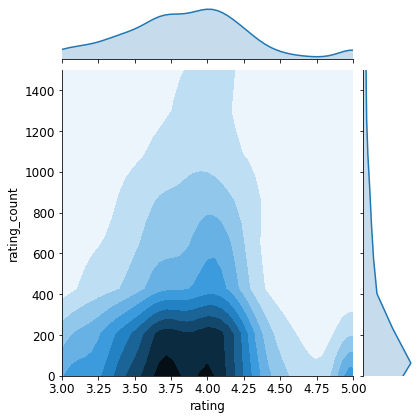

In [25]:
plt.rcParams.update({'font.size': 12})
sns.jointplot(x="rating",y="rating_count",data=Datos_PIA_limpio,xlim=[3,5],ylim=[0,1500],kind="kde")

Ahora comparamos el valor con la cantidad de ratings, acotando la gráfica a los intervalos significativos. Naturalmente, la distribución del número de ratings disminuye conforme el número aumenta, por lo que la mayor densidad se encuentra cerca del fondo de la gráfica. Considerando lo observado de la gráfica anterior, el mayor aporte a la densidad en el rating 5 corresponde a los elementos aún no calificados.

Ahora analizaremos la relación de estas variables con otras que podrán influir en su resultado. Iniciamos con las etiquetas de la columna tags.

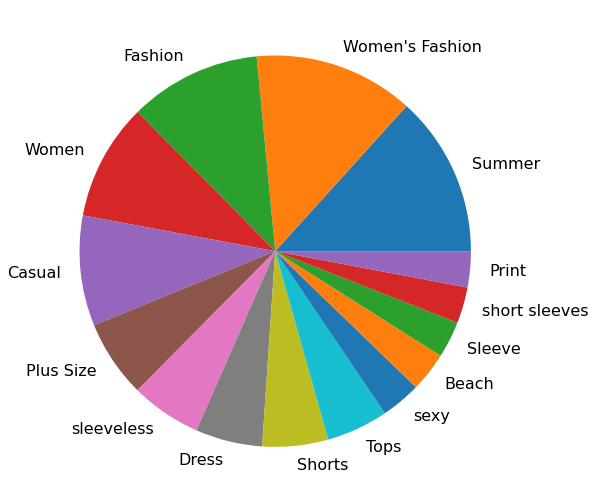

In [26]:
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 16})
plt.pie("count",labels="keyword",data=etiquetas[0:15])
plt.show()

Visualizamos las 15 palabras claves de búsqueda para la mayoría de nuestros productos de verano, siento las etiquetas con mayor frecuencia "Summer", "Women's Fashion", "Fashion" y "Women". De lo anterior podemos inferir que nuestro mayor público en esta base de datos esta dirigido hacia las mujeres. A continuación comparamos la distribución de estas etiquetas en un subconjunto de productos exitosos.

n =  119


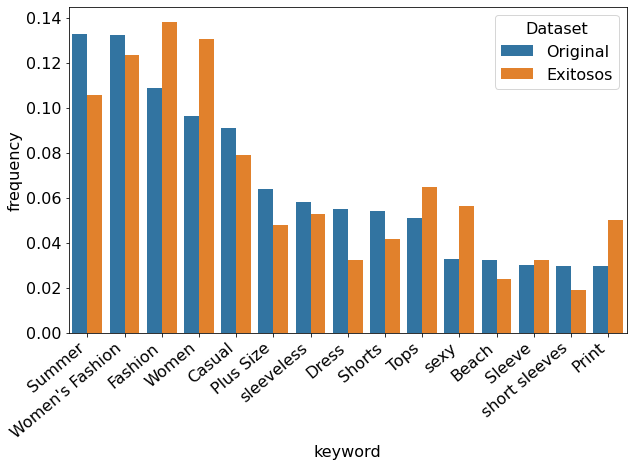

In [27]:
dataset=Datos_PIA_limpio[(Datos_PIA_limpio["units_sold"]>=5000)&(Datos_PIA_limpio["rating"]>=4.11)]
print("n = ",dataset.shape[0])
freq=[]
for tag in etiquetas[0:15]["keyword"]:
    freq.append(dataset[dataset["tags"].str.contains(tag)].shape[0])
relative_count=etiquetas[0:15]["count"]/sum(etiquetas[0:15]["count"])
relative_freq=[x/sum(freq) for x in freq]
selection=pd.DataFrame({"keyword":etiquetas[0:15]["keyword"],"Original":relative_count,"Exitosos":relative_freq})
bars=pd.melt(selection,id_vars="keyword",var_name="Dataset",value_name="frequency")
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 16})
p=sns.barplot(x="keyword",y="frequency",data=bars,hue="Dataset")
p.set_xticklabels(p.get_xticklabels(), rotation=40, ha="right")
plt.show()

Comparamos las mismas 15 etiquetas para los productos del último cuartil de unidades vendidas y de rating: productos con calificación mayor a 4.11 y ventas superiores a 5000. Podemos observar la infuencia de algunas de estas etiquetas en la pertenencia del producto en el subconjunto deseado. Etiquetas como "Fashion", "Women", "Tops", "sexy" y "Print" aparecen con mayor frecuencia en los productos exitosos, por lo que etiquetar un producto con estas palabras influirá de manera positiva en su éxito.

A continuación, analizamos la influencia de las insignias.

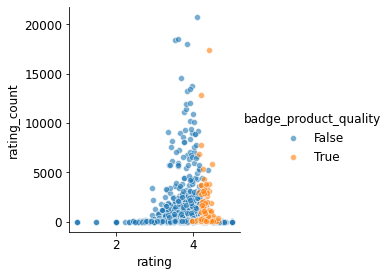

In [28]:
plt.rcParams.update({'font.size': 12})
g = sns.FacetGrid(Datos_PIA_limpio,hue="badge_product_quality",height=4)
g.map(sns.scatterplot, "rating", "rating_count",alpha=.6)
g.add_legend()

Aqui observamos que es cierto que la calidad del producto se ve reflejada en la badge de calidad, y esto nos confirma que sí ya que las que la tiene tienden a estar en más de 4 de rating.

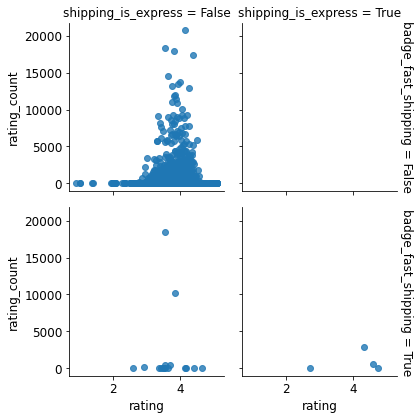

In [29]:
g = sns.FacetGrid(Datos_PIA_limpio,row="badge_fast_shipping", col="shipping_is_express", margin_titles=True)
g.map(sns.regplot, "rating","rating_count", fit_reg=False, x_jitter=.1)

Aquí lo que se verifica es que también el rating se vea influido por el envio rápido, la mayoria no lo tiene, y los que lo tienen no son suficientes. Además nos podemos dar cuenta que varios datos que se supone la tienen no tienen un envío express.

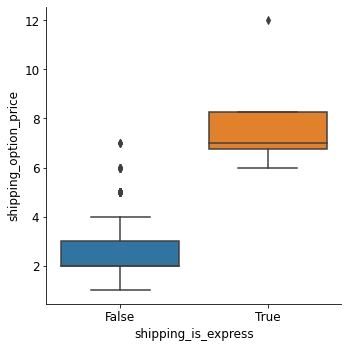

In [30]:
plt.rcParams.update({'font.size': 12})
sns.catplot(x="shipping_is_express",y="shipping_option_price",kind="box",data=Datos_PIA_limpio)

En esta gráfica también se asegura que el precio por el envío express resulta ser mayor por gran cantidad que uno normal por lo que hay que tenerlo a consideración.

Por último analizaremos la influencia de los colores del producto.

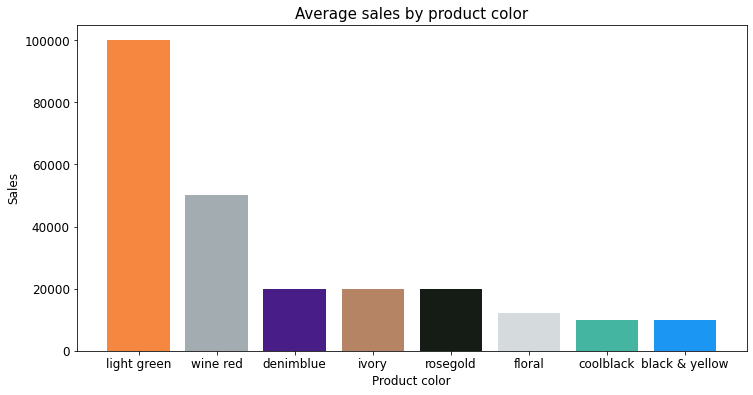

In [31]:
columns = ['product_color','units_sold']
df = df.groupby('product_color').mean()
df = df.sort_values(by='units_sold', ascending=False)
df = df.reset_index()
colors = ['#f68741', '#a3acb1', '#491d88', '#b48464', 
          '#151c15','#d5dadd','#43b5a0','#1b96f3',
          '#ac0e28','#446b04','#f2b0a5','#fcdf87'
]
plt.subplots(figsize=(12,6))
plt.bar(df[0:8]['product_color'], df[0:8]['units_sold'], color=colors)
plt.title('Average sales by product color', fontsize=15)
plt.xlabel('Product color', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()

La gráfica nos muestra que colores tienen en promedio una mayor cantidad de ventas, podemos notar que el color verde claro tiene un mejor recibimiento por parte de los clientes en productos de verano lo que nos indica que es un color que podría ser preferido por los clientes para futuras compras de verano.

### Conclusión de Análisis Descriptivo

A partir del análisis estadítsico y gráfico podemos determinar algunas de las características principales que podrían influir en el éxito de un producto vendido en esta plataforma. Pudimos comprobar algunas hipótesis importantes, como la influencia de la inclusión de algunas de las insignias o el uso de ciertas etiquetas y colores; rechazar variables no tan significativas, como la falta de un número robusto de datos con insignia de envío rápido; y encontrar consideraciones importantes para la selección del subconjunto a analizar, como el descartar los productos que no han recibido un rating.

## Técnica de Minería de Datos
A continuación modificamos el formato de la base de datos para utilizar sus columnas en un árbol de decisión. La modificación principal consiste en eliminar las columnas de texto y remplazarlas con columnas numéricas que muestren la información deseada de estas columnas.

In [32]:
dataset=Datos_PIA_limpio
dataset["local_title"]=[dataset.title[i]!=dataset.title_orig[i] for i in range(dataset.shape[0])]
dataset["discount"]=1-dataset.price/dataset.retail_price
dataset=pd.get_dummies(dataset,columns=['origin_country'], prefix='from')
dataset=pd.get_dummies(dataset,columns=['product_color'], prefix='color')
extra_colors=dataset.iloc[:,34:].columns[dataset.iloc[:,34:].sum()<5].tolist()
dataset=dataset.drop(columns=extra_colors)
popular_tags=etiquetas.iloc[:40,1].tolist()
for tag in popular_tags:
    dataset["tag_"+tag]=dataset["tags"].str.contains(tag)
dataset=dataset.drop(columns=dataset.columns[dataset.dtypes=="O"].tolist())

print(dataset.shape,"\n",dataset.columns)

(1573, 94) 
 Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'has_urgency_banner', 'merchant_info_subtitle', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture', 'local_title',
       'discount', 'from_AT', 'from_CN', 'from_GB', 'from_SG', 'from_US',
       'from_VE', 'from_ninguno', 'color_armygreen', 'color_beige',
       'color_black', 'color_blue', 'color_brown', 'color_coffee',
       'color_darkblue', 'color_floral', 'color_gray', 'color_green',
       'color_grey', 'color_khaki', 'color_lightblue', 'color_multicolor',
       'color_navyblue', 'color_ninguno', 'color_orange', 'color_pink',
       'color_purple', 'color_red', 'color_rose', 'color_rosered',
       'color_skyblue', 'color_white', 'color_white & gr

Primero creamos los conjuntos a utilizar en la clasificación de las unidades vendidas e importamos las librerías necesarias.

In [33]:
from sklearn import tree
from sklearn.tree import _tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import random

X1=dataset[dataset.rating_count>0].drop(columns=["units_sold"])
y1=dataset[dataset.rating_count>0].units_sold

Seleccionamos el mejor de distintos árboles generados aleatoriamente para distintas particiones aleatorias de los conjuntos.

In [34]:
best=[0,0,0]
for i in range(100):
    r=random.randint(0,10000)
    X_train,X_subset,y_train,y_subset=train_test_split(X1,y1,test_size=0.3,random_state=r)
    X_test,X_check,y_test,y_check=train_test_split(X_subset,y_subset,test_size=0.5,random_state=r)
    top=[0,0]
    for j in range(100):
        s=random.randint(0,10000)
        T1=DecisionTreeClassifier(random_state=s)
        T1.fit(X_train,y_train)
        y_pred=T1.predict(X_test)
        if accuracy_score(y_test,y_pred)>top[1]:
            top=[s,accuracy_score(y_test,y_pred)]
    if top[1]>best[2]:
        best=[r,top[0],top[1]]
print("random states = [",best[0],",",best[1],"], accuracy = ",best[2])

random states = [ 2365 , 3116 ], accuracy =  0.8034934497816594


Guardamos este resultado y verificamos la exactitud de la clasificación con el conjunto de validación.

In [35]:
best[0],best[1]=2365,3116

X_train,X_subset,y_train,y_subset=train_test_split(X1,y1,test_size=0.3,random_state=best[0])
X_test,X_check,y_test,y_check=train_test_split(X_subset,y_subset,test_size=0.5,random_state=best[0])
Tree_1=DecisionTreeClassifier(random_state=best[1])
Tree_1.fit(X_train,y_train)
y_pred=Tree_1.predict(X_check)
accuracy_score(y_check,y_pred)

0.7086956521739131

La siguiente es la serie de instrucciones que el árbol de decisión toma para clasificar las unidades vendidas.

In [36]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
    
print("Categorías: ",list(map(str,list(y1.unique()))))
tree_to_code(Tree_1,X1.columns)

Categorías:  ['100', '20000', '5000', '10', '50000', '1000', '10000', '100000', '50', '2', '7']
def tree(price, retail_price, uses_ad_boosts, rating, rating_count, badge_local_product, badge_product_quality, badge_fast_shipping, product_variation_inventory, shipping_option_price, shipping_is_express, countries_shipped_to, has_urgency_banner, merchant_info_subtitle, merchant_rating_count, merchant_rating, merchant_has_profile_picture, local_title, discount, from_AT, from_CN, from_GB, from_SG, from_US, from_VE, from_ninguno, color_armygreen, color_beige, color_black, color_blue, color_brown, color_coffee, color_darkblue, color_floral, color_gray, color_green, color_grey, color_khaki, color_lightblue, color_multicolor, color_navyblue, color_ninguno, color_orange, color_pink, color_purple, color_red, color_rose, color_rosered, color_skyblue, color_white, color_white & green, color_winered, color_yellow, tag_Summer, tag_Women's Fashion, tag_Fashion, tag_Women, tag_Casual, tag_Plus Size, tag

                        return [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
                else:  # if price > 20.5
                  return [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
            else:  # if retail_price > 45.0
              if color_blue <= 0.5:
                if merchant_rating <= 4.165432929992676:
                  if retail_price <= 53.0:
                    if merchant_has_profile_picture <= 0.5:
                      return [[0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]]
                    else:  # if merchant_has_profile_picture > 0.5
                      return [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
                  else:  # if retail_price > 53.0
                    return [[0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]]
                else:  # if merchant_rating > 4.165432929992676
                  if retail_price <= 85.0:
                    return [[0. 0. 0. 0. 0. 6. 0. 0. 0. 0.]]
                  else:  # if retail_price > 85.0
                    return [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
            

El siguiente diagrama muestra la estructura de este árbol de decisión.

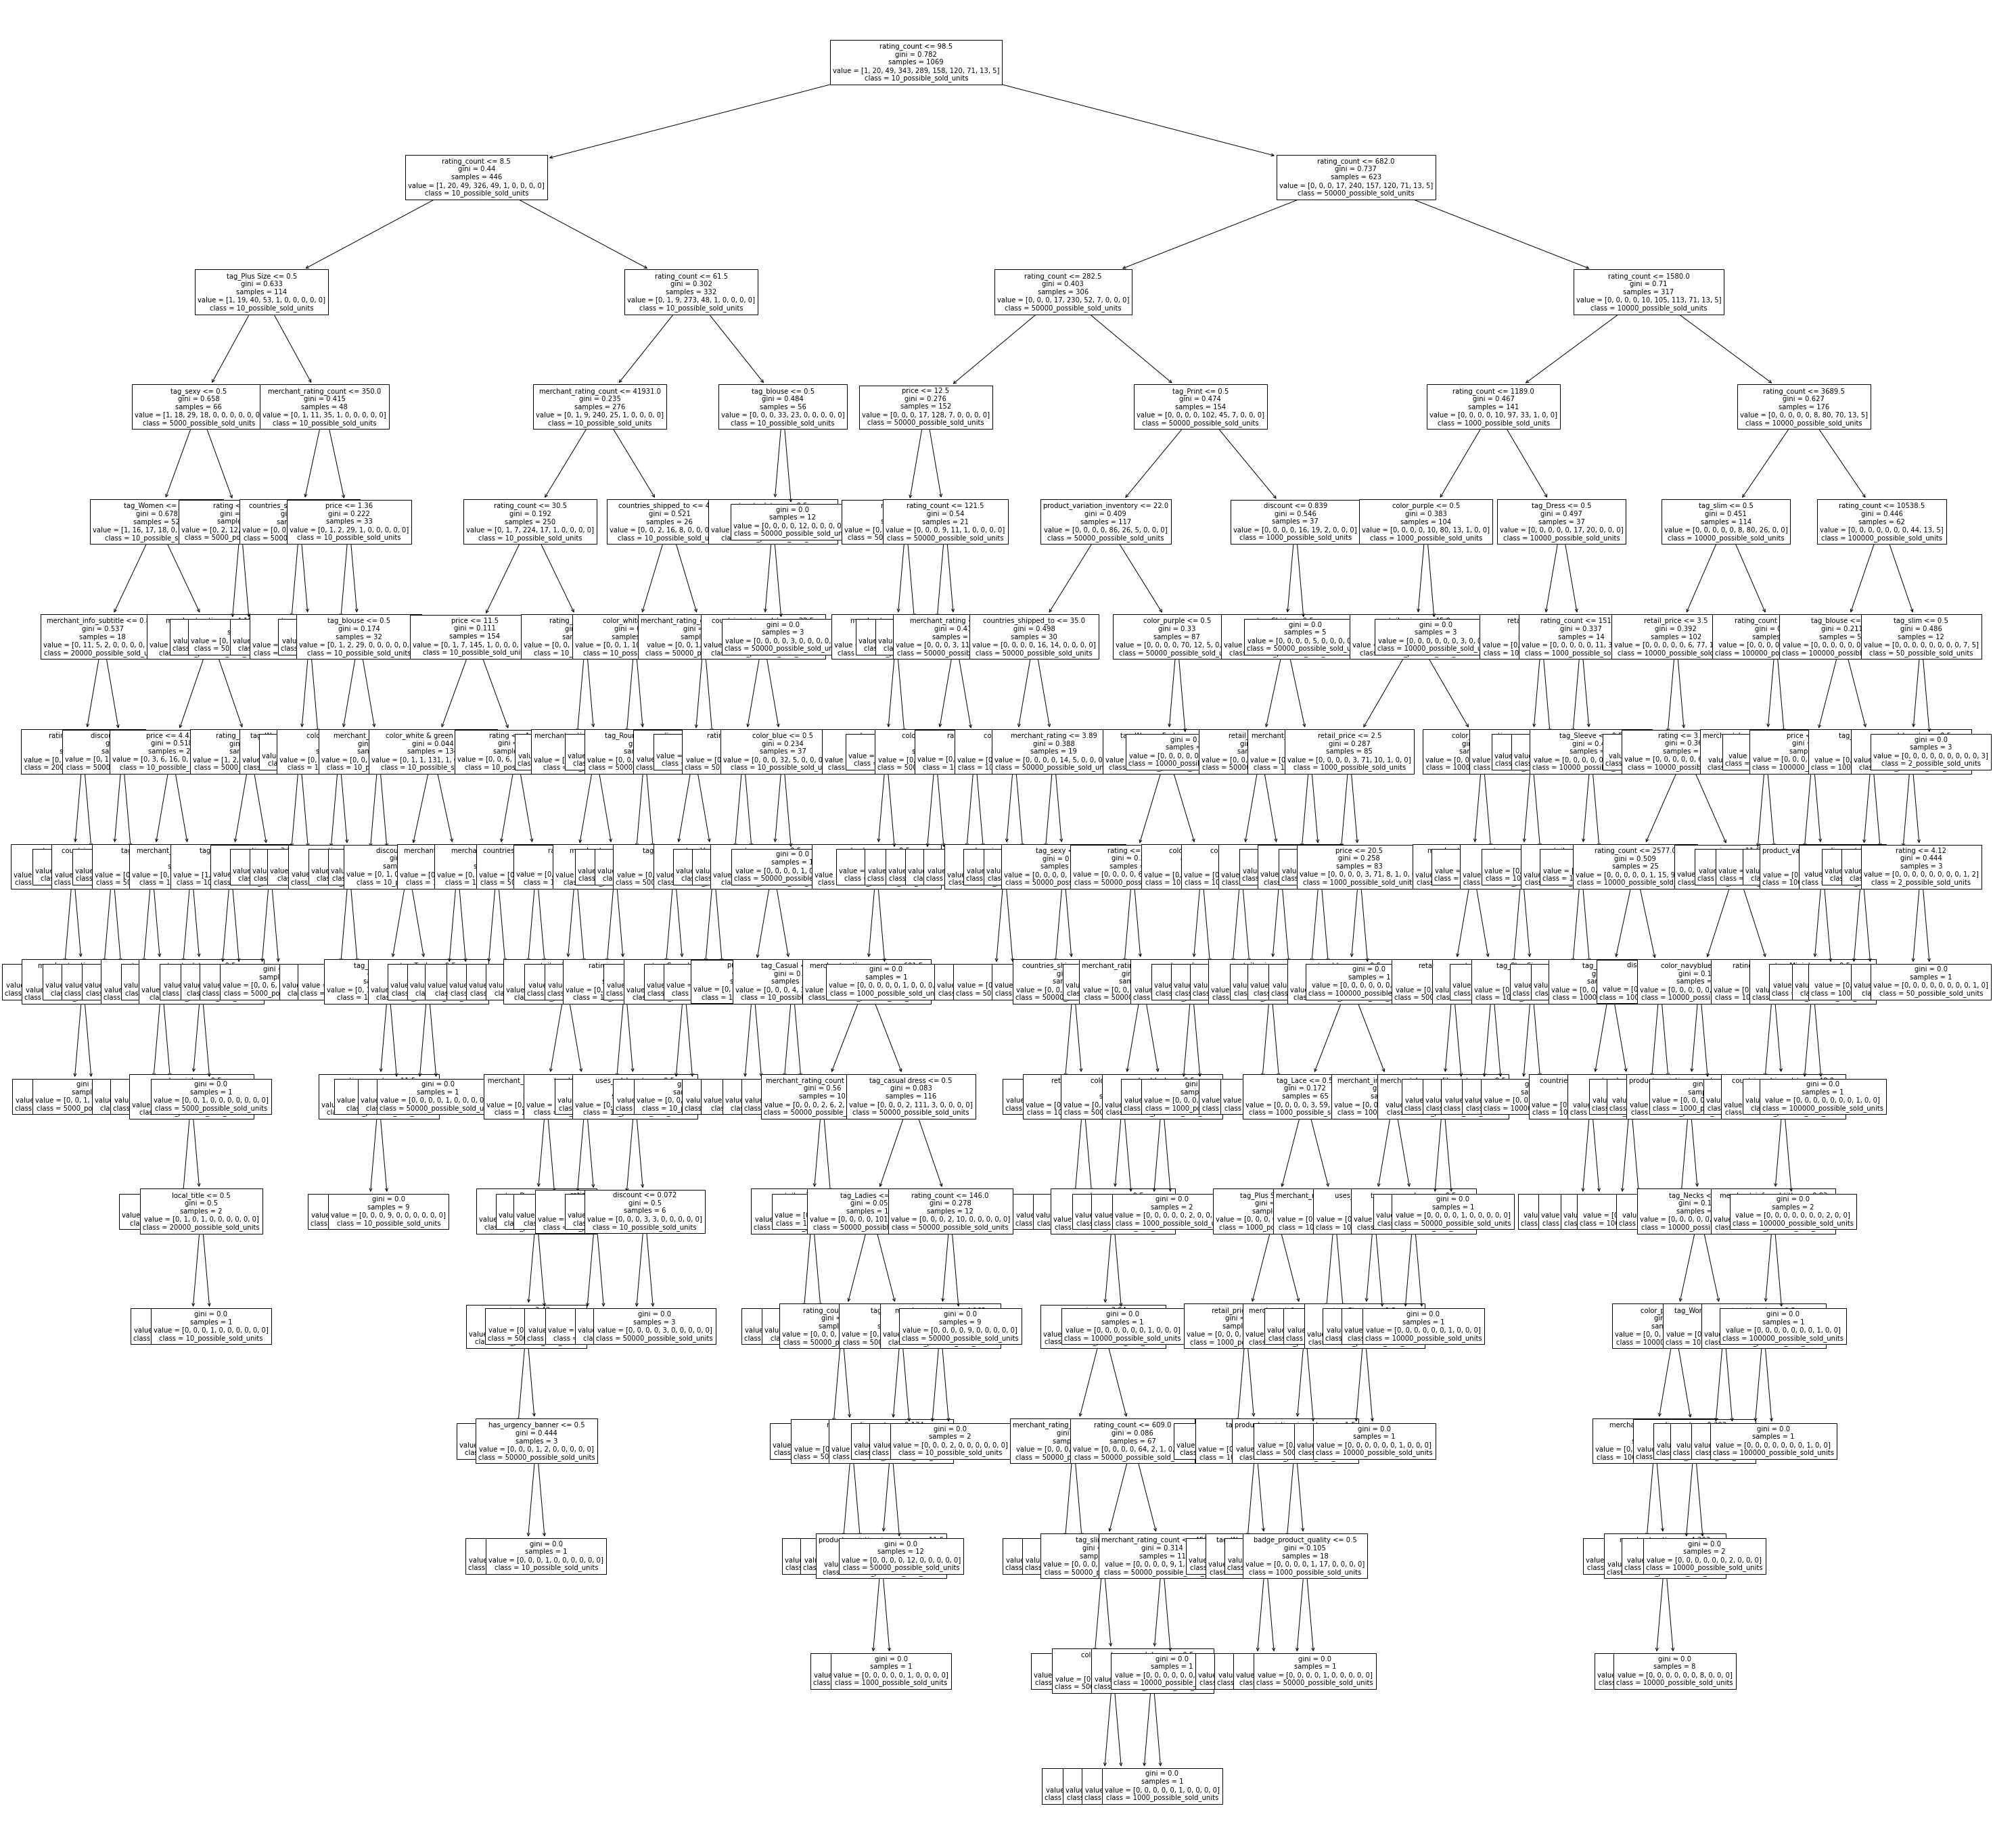

In [37]:
unidadesvend=list(map(str,list(y1.unique())))
j=0
for i in unidadesvend:
    i=i+"_possible_sold_units"
    unidadesvend[j]=i
    j=j+1
fig, ax = plt.subplots(figsize=(50, 50))
tree.plot_tree(Tree_1,feature_names=X1.columns,class_names=unidadesvend, fontsize=10)
plt.savefig('tree_high_dpi', dpi=100)

Para la clasificación del rating, creamos una columna categórica de calificación, de acuerdo a los 6 sextiles de la distribución de rating.

In [38]:
quantiles=[dataset.rating.quantile(i/6) for i in range(1,6)]

def rank(rating):
    for i in range(5):
        if rating<quantiles[i]:
            return chr(ord('@')+6-i)
    return 'A'
        
new_dataset=dataset
new_dataset["ranking"]=[rank(new_dataset.rating[i]) for i in range(new_dataset.shape[0])]
X2=new_dataset[new_dataset.rating_count>0].drop(columns=["units_sold","rating","rating_count","ranking"])
y2=new_dataset[new_dataset.rating_count>0].ranking

Ahora repetimos el mismo procedimiento y mostramos los mismos resultados que obtuvimos para el árbol anterior.

In [39]:
best=[0,0,0]
for i in range(100):
    r=random.randint(0,10000)
    X_ntrain,X_nsubset,y_ntrain,y_nsubset=train_test_split(X2,y2,test_size=0.3,random_state=r)
    X_ntest,X_ncheck,y_ntest,y_ncheck=train_test_split(X_nsubset,y_nsubset,test_size=0.5,random_state=r)
    top=[0,0]
    for j in range(100):
        s=random.randint(0,10000)
        T2=DecisionTreeClassifier(random_state=s)
        T2.fit(X_ntrain,y_ntrain)
        y_npred=T2.predict(X_ntest)
        if accuracy_score(y_ntest,y_npred)>top[1]:
            top=[s,accuracy_score(y_ntest,y_npred)]
    if top[1]>best[2]:
        best=[r,top[0],top[1]]
print("random states = [",best[0],",",best[1],"], accuracy = ",best[2])

random states = [ 4081 , 7548 ], accuracy =  0.4890829694323144


In [40]:
best[0],best[1]=4081,7548

X_ntrain,X_nsubset,y_ntrain,y_nsubset=train_test_split(X2,y2,test_size=0.3,random_state=best[0])
X_ntest,X_ncheck,y_ntest,y_ncheck=train_test_split(X_nsubset,y_nsubset,test_size=0.5,random_state=best[0])
Tree_2=DecisionTreeClassifier(random_state=best[1])
Tree_2.fit(X_ntrain,y_ntrain)
y_npred=Tree_2.predict(X_ncheck)
accuracy_score(y_ncheck,y_npred)

0.45652173913043476

In [41]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
    
print("Categorías: ",list(map(str,list(y2.unique()))))
tree_to_code(Tree_2,X2.columns)

Categorías:  ['D', 'E', 'B', 'F', 'A', 'C']
def tree(price, retail_price, uses_ad_boosts, badge_local_product, badge_product_quality, badge_fast_shipping, product_variation_inventory, shipping_option_price, shipping_is_express, countries_shipped_to, has_urgency_banner, merchant_info_subtitle, merchant_rating_count, merchant_rating, merchant_has_profile_picture, local_title, discount, from_AT, from_CN, from_GB, from_SG, from_US, from_VE, from_ninguno, color_armygreen, color_beige, color_black, color_blue, color_brown, color_coffee, color_darkblue, color_floral, color_gray, color_green, color_grey, color_khaki, color_lightblue, color_multicolor, color_navyblue, color_ninguno, color_orange, color_pink, color_purple, color_red, color_rose, color_rosered, color_skyblue, color_white, color_white & green, color_winered, color_yellow, tag_Summer, tag_Women's Fashion, tag_Fashion, tag_Women, tag_Casual, tag_Plus Size, tag_sleeveless, tag_Dress, tag_Shorts, tag_Tops, tag_sexy, tag_Beach, tag_Sle

                              return [[0. 0. 1. 0. 0. 0.]]
                        else:  # if tag_Mini dress > 0.5
                          if merchant_rating_count <= 45708.5:
                            return [[0. 0. 2. 0. 0. 0.]]
                          else:  # if merchant_rating_count > 45708.5
                            if retail_price <= 33.0:
                              return [[0. 0. 0. 0. 0. 1.]]
                            else:  # if retail_price > 33.0
                              return [[0. 0. 0. 1. 0. 0.]]
                      else:  # if tag_Print > 0.5
                        if color_white <= 0.5:
                          return [[0. 2. 0. 0. 0. 0.]]
                        else:  # if color_white > 0.5
                          return [[0. 0. 1. 0. 0. 0.]]
                  else:  # if tag_Shorts > 0.5
                    if color_multicolor <= 0.5:
                      if merchant_rating <= 3.9191761016845703:
                        if product_variatio

                          if merchant_rating_count <= 361387.0:
                            if tag_Tank <= 0.5:
                              if tag_T Shirts <= 0.5:
                                if discount <= 0.017500000074505806:
                                  if tag_casual dress <= 0.5:
                                    if merchant_info_subtitle <= 0.8949999809265137:
                                      if tag_Summer <= 0.5:
                                        if price <= 8.5:
                                          return [[0. 0. 0. 7. 0. 0.]]
                                        else:  # if price > 8.5
                                          if countries_shipped_to <= 39.0:
                                            return [[0. 2. 0. 0. 0. 0.]]
                                          else:  # if countries_shipped_to > 39.0
                                            if merchant_rating_count <= 13181.0:
                                              return [[

                        return [[0. 6. 0. 0. 0. 0.]]
              else:  # if color_armygreen > 0.5
                if tag_slim <= 0.5:
                  return [[0. 0. 0. 0. 0. 7.]]
                else:  # if tag_slim > 0.5
                  if discount <= -0.12142857536673546:
                    if tag_Print <= 0.5:
                      return [[0. 0. 0. 1. 0. 0.]]
                    else:  # if tag_Print > 0.5
                      return [[0. 1. 0. 0. 0. 0.]]
                  else:  # if discount > -0.12142857536673546
                    return [[0. 0. 0. 0. 2. 0.]]
            else:  # if merchant_rating > 4.322209119796753
              if tag_Shorts <= 0.5:
                if shipping_option_price <= 2.5:
                  if product_variation_inventory <= 29.5:
                    if discount <= 0.7326839864253998:
                      return [[0. 2. 0. 0. 0. 0.]]
                    else:  # if discount > 0.7326839864253998
                      return [[1. 0. 0. 0. 0.

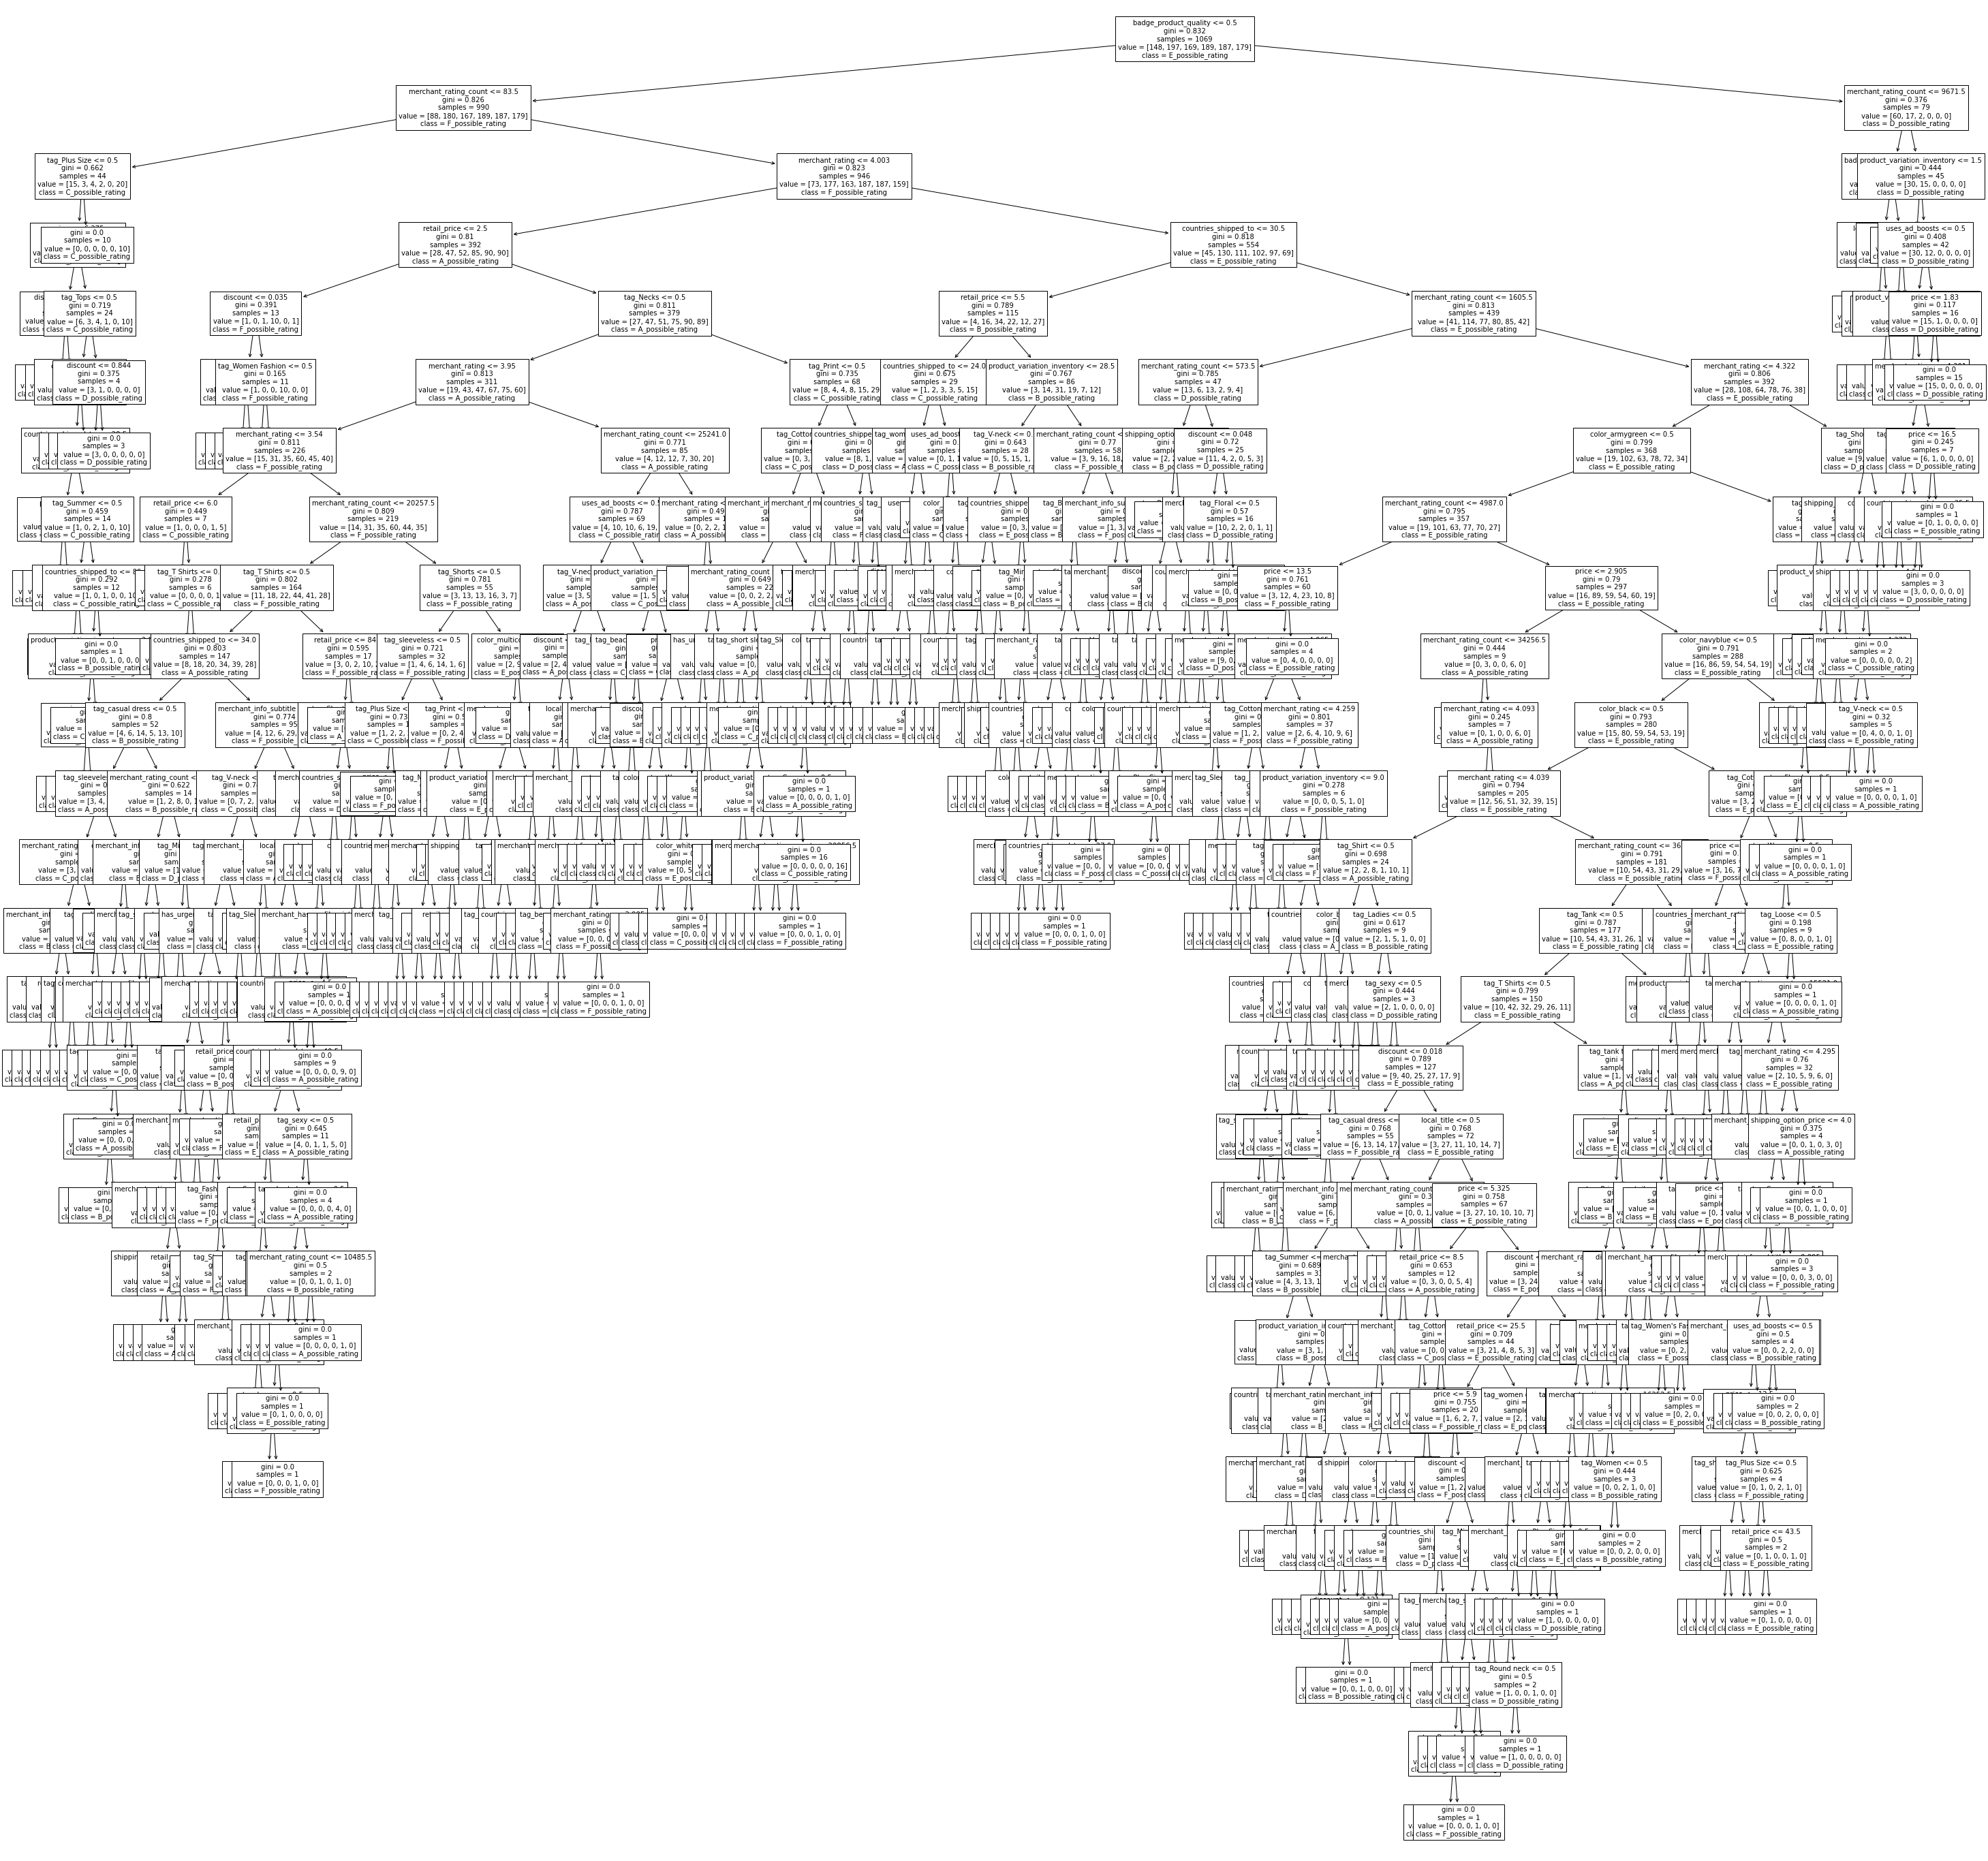

In [42]:
rat=list(map(str,list(y2.unique())))
j=0
for i in rat:
    i=i+"_possible_rating"
    rat[j]=i
    j=j+1
fig, ax = plt.subplots(figsize=(50, 50))
tree.plot_tree(Tree_2,feature_names=X2.columns,class_names=rat, fontsize=10)
plt.savefig('tree_high_dpi', dpi=100)

Probamos las clasificaciones con un producto de ejemplo, con buen rating y la mayor categoría de unidades vendidas.

In [43]:
i = 92
Datos_PIA_limpio[i:i+1]

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badge_local_product,badge_product_quality,...,urgency_text,origin_country,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,local_title,discount
92,Femmes Camisole extensible Spaghetti Strap Lon...,Women Stretchy Camisole Spaghetti Strap Long T...,5.77,48,100000,False,4.1,20744,False,False,...,ninguno,CN,0.86,330405,4.067348,53f2beb39020ee03566d6e18,True,544b079d1280fa28eee9b380,True,0.879792


In [44]:
dataset=Datos_PIA_limpio
dataset["local_title"]=[dataset.title[i]!=dataset.title_orig[i] for i in range(dataset.shape[0])]
dataset["discount"]=1-dataset.price/dataset.retail_price
dataset=pd.get_dummies(dataset,columns=['origin_country'], prefix='from')
dataset=pd.get_dummies(dataset,columns=['product_color'], prefix='color')
extra_colors=dataset.iloc[:,34:].columns[dataset.iloc[:,34:].sum()<5].tolist()
dataset=dataset.drop(columns=extra_colors)
popular_tags=etiquetas.iloc[:40,1].tolist()
for tag in popular_tags:
    dataset["tag_"+tag]=dataset["tags"].str.contains(tag)
dataset=dataset.drop(columns=dataset.columns[dataset.dtypes=="O"].tolist())

print("Producto:",i,"\nVentas:",Tree_1.predict(dataset[i:i+1].drop(columns=["units_sold"])))
print("Rating:",Tree_2.predict(dataset[i:i+1].drop(columns=["units_sold","rating","rating_count"])))

Producto: 92 
Ventas: [100000]
Rating: ['B']
